In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from data_preparation import PoseDataset
from models import *
import pdb
import matplotlib.pyplot as plt
from pathlib import Path
from pipeline import Trainer
import json
import gc

In [ ]:
# Runs all configs
configs_path = Path('current_configs')
for conf in configs_path.iterdir():
    if conf.is_file():
        trainer = Trainer(conf)
        trainer.train()
        del trainer
        gc.collect()
        torch.cuda.empty_cache()
        # torch.cuda.empty_cache()

In [6]:
trainer = Trainer('current_configs/cbam-sl.yaml')

In [7]:
trainer.train()
gc.collect()
torch.cuda.empty_cache()

Training models.ResNetCBAM with parameters:
{'block_name': 'models.BasicBlockWithCBAM', 'layers': [2, 2, 2, 2], 'pos_dim': 3, 'orien_dim': 4}
Epoch 1/50: Train Loss = 601.4489, Val Loss = 806.5398
Epoch 2/50: Train Loss = 241.0774, Val Loss = 537.9509
Epoch 3/50: Train Loss = 88.7060, Val Loss = 451.6513
Epoch 4/50: Train Loss = 36.5503, Val Loss = 115.0617
Epoch 5/50: Train Loss = 27.2950, Val Loss = 70.7825
Epoch 6/50: Train Loss = 21.2697, Val Loss = 183.3032
Epoch 7/50: Train Loss = 27.9269, Val Loss = 143.1540
Epoch 8/50: Train Loss = 22.6839, Val Loss = 55.6715
Epoch 9/50: Train Loss = 20.7110, Val Loss = 75.2827
Epoch 10/50: Train Loss = 25.9159, Val Loss = 119.9273
Epoch 11/50: Train Loss = 33.6504, Val Loss = 150.3006
Epoch 12/50: Train Loss = 44.4436, Val Loss = 182.3448
Epoch 13/50: Train Loss = 37.2519, Val Loss = 55.0046
Epoch 14/50: Train Loss = 36.2228, Val Loss = 39.2703
Epoch 15/50: Train Loss = 31.3661, Val Loss = 104.5441
Epoch 16/50: Train Loss = 18.5996, Val Loss =

In [ ]:
with open('experiments/VGG16_20250520_155837/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='Training loss')
    plt.plot(history['val_loss'], label='Validation loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

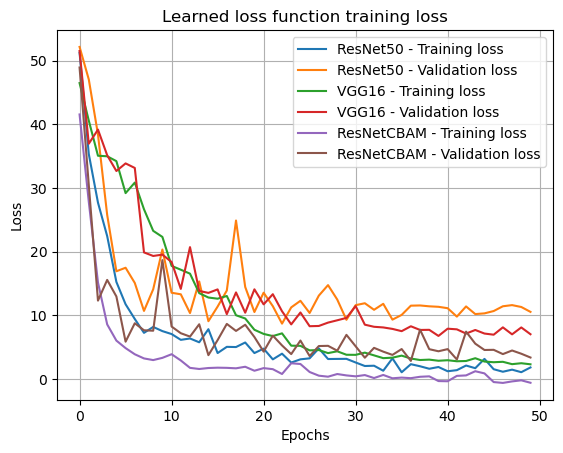

In [11]:
# Learned loss function
with open('experiments/ResNet50_CameraPoseLoss_20250528_002325/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='ResNet50 - Training loss')
    plt.plot(history['val_loss'], label='ResNet50 - Validation loss')
with open('experiments/VGG16_CameraPoseLoss_20250528_100049/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='VGG16 - Training loss')
    plt.plot(history['val_loss'], label='VGG16 - Validation loss')
with open('experiments/ResNetCBAM_CameraPoseLoss_20250528_101215/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='ResNetCBAM - Training loss')
    plt.plot(history['val_loss'], label='ResNetCBAM - Validation loss')

plt.grid()
plt.title("Learned loss function training loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

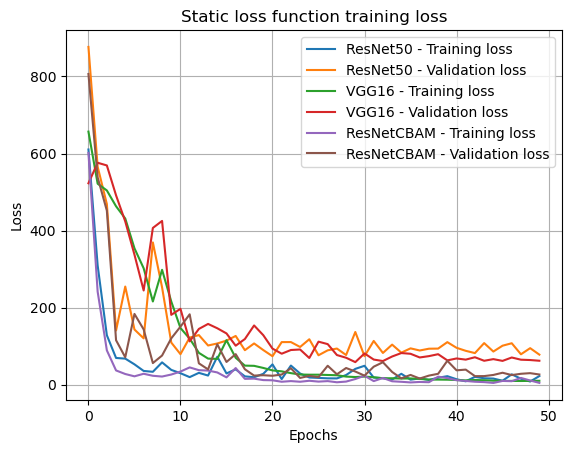

In [12]:
# Learned loss function
with open('experiments/ResNet50_StaticLoss_20250528_082519/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='ResNet50 - Training loss')
    plt.plot(history['val_loss'], label='ResNet50 - Validation loss')
with open('experiments/VGG16_StaticLoss_20250528_094923/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='VGG16 - Training loss')
    plt.plot(history['val_loss'], label='VGG16 - Validation loss')
with open('experiments/ResNetCBAM_StaticLoss_20250528_115127/history.json', 'r') as file:
    history = json.load(file)
    plt.plot(history['train_loss'], label='ResNetCBAM - Training loss')
    plt.plot(history['val_loss'], label='ResNetCBAM - Validation loss')

plt.grid()
plt.title("Static loss function training loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

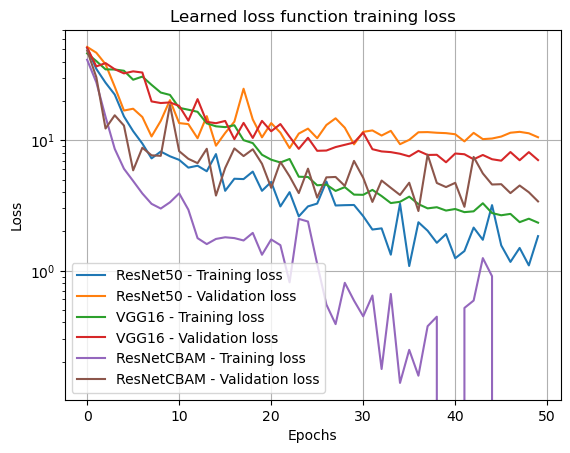

In [13]:
# Learned loss function
with open('experiments/ResNet50_CameraPoseLoss_20250528_002325/history.json', 'r') as file:
    history = json.load(file)
    plt.semilogy(history['train_loss'], label='ResNet50 - Training loss')
    plt.semilogy(history['val_loss'], label='ResNet50 - Validation loss')
with open('experiments/VGG16_CameraPoseLoss_20250528_100049/history.json', 'r') as file:
    history = json.load(file)
    plt.semilogy(history['train_loss'], label='VGG16 - Training loss')
    plt.semilogy(history['val_loss'], label='VGG16 - Validation loss')
with open('experiments/ResNetCBAM_CameraPoseLoss_20250528_101215/history.json', 'r') as file:
    history = json.load(file)
    plt.semilogy(history['train_loss'], label='ResNetCBAM - Training loss')
    plt.semilogy(history['val_loss'], label='ResNetCBAM - Validation loss')

plt.grid()
plt.title("Learned loss function training loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

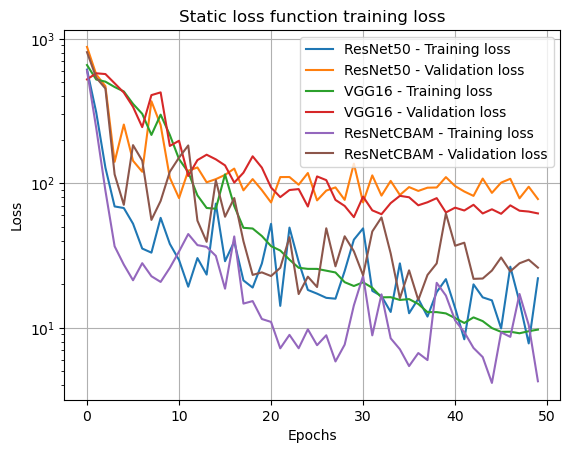

In [14]:
# Learned loss function
with open('experiments/ResNet50_StaticLoss_20250528_082519/history.json', 'r') as file:
    history = json.load(file)
    plt.semilogy(history['train_loss'], label='ResNet50 - Training loss')
    plt.semilogy(history['val_loss'], label='ResNet50 - Validation loss')
with open('experiments/VGG16_StaticLoss_20250528_094923/history.json', 'r') as file:
    history = json.load(file)
    plt.semilogy(history['train_loss'], label='VGG16 - Training loss')
    plt.semilogy(history['val_loss'], label='VGG16 - Validation loss')
with open('experiments/ResNetCBAM_StaticLoss_20250528_115127/history.json', 'r') as file:
    history = json.load(file)
    plt.semilogy(history['train_loss'], label='ResNetCBAM - Training loss')
    plt.semilogy(history['val_loss'], label='ResNetCBAM - Validation loss')

plt.grid()
plt.title("Static loss function training loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()